# Importing data and basic EDA

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI ML Trainee/Churn Rate/Churn_Modelling.csv')

In [ ]:
data.describe()

In [ ]:
data.head()

In [ ]:
data.info()

# DATA cleaning and Pre-processing

In [ ]:
data2 = data.drop(['Surname'],axis = 1)
data2 = data2.drop(['RowNumber'],axis = 1)
data2 = data2.drop(['CustomerId'],axis = 1)
data2.describe(include='all')

In [ ]:
Z = pd.get_dummies(data2["Geography"])

In [ ]:
Z = Z.iloc[:,[1,2]]
Z

In [ ]:
data2 = data2.drop(['Geography'],axis = 1)
data2["Germany"] = Z.iloc[:,0]
data2["Spain"] = Z.iloc[:,1]
data2.head()

In [ ]:
X = data2.drop(["Left"],axis = 1)
Y = data2["Left"]
Z = pd.get_dummies(data2["Gender"])
Z = Z.iloc[:,0]
X["isFemale"] = Z
X = X.drop(['Gender'],axis = 1)

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
X.isna().sum()

In [ ]:
Y.isna().sum()

In [36]:
def acc(cm):
  num = cm[0,0] + cm[1,1]
  dem = num + cm[0,1] + cm[1,0]
  ac = num/dem
  return ac

# Deep Learning

In [19]:

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 69)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense( 6,activation = 'relu',input_dim = 11))
classifier.add(Dense(3,activation = 'relu'))
classifier.add(Dense(1,activation = 'sigmoid'))
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

model = classifier.fit(X_train,Y_train,batch_size=32,epochs=100,
               validation_data = (X_test,Y_test))


Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm


Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5823 - accuracy: 0.6986 - val_loss: 0.5085 - val_accuracy: 0.7840
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7851 - val_loss: 0.4725 - val_accuracy: 0.7875
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.7981 - val_loss: 0.4579 - val_accuracy: 0.7910
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4261 - accuracy: 0.8034 - val_loss: 0.4487 - val_accuracy: 0.7985
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4275 - accuracy: 0.8073 - val_loss: 0.4378 - val_accuracy: 0.8175
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8238 - val_loss: 0.4306 - val_accuracy: 0.8215
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4123 - accuracy: 0.8246 - val_loss: 0.4245 - val_accuracy: 0.8305

array([[1503,   75],
       [ 209,  213]])

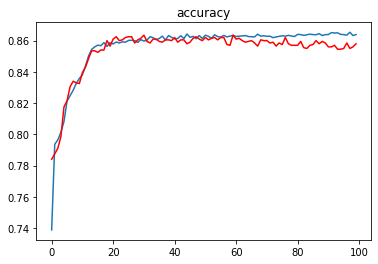

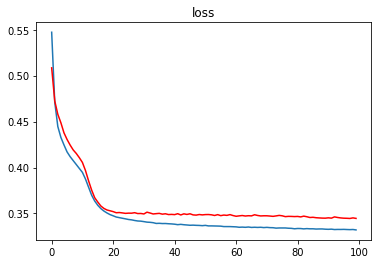

In [21]:


import matplotlib.pyplot as plt

#visiualizing error
acc = model.history['accuracy']
val_acc = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epchs = len(acc)

plt.plot(range(0,epchs), acc)

plt.plot(range(0,epchs), val_acc,color = 'red')
plt.title("accuracy")
plt.show()


plt.plot(range(0,epchs), loss)

plt.plot(range(0,epchs), val_loss,color = 'red')
plt.title("loss")
plt.show()



In [37]:
acc(cm)

0.858

# Classical / Modern ML

##Decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
from sklearn.metrics import mean_squared_error

In [24]:
tree.fit(X_train,Y_train)
pred_tree_train = tree.predict(X_train)
np.sqrt(mean_squared_error(Y_train,pred_tree_train))

0.0

In [25]:
pred_tree_test = tree.predict(X_test)
np.sqrt(mean_squared_error(Y_test,pred_tree_test))

0.4685082710048991

In [38]:
cm_tree = confusion_matrix(pred_tree_test,Y_test)
cm_tree
acc(cm_tree)

0.7805

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)
pred_forest_test = forest.predict(X_test)
np.sqrt(mean_squared_error(Y_test,pred_forest_test))

0.37549966711037175

In [39]:
cm_forest = confusion_matrix(pred_forest_test,Y_test)
cm_forest 
acc(cm_forest)

0.859

## Using advance tools like Cross_val_score
to be continued